In [1]:
import pandas as pd

file_path = 'IRE_GHG/co2_mhd_surface-flask_1_ccgg_event.txt'
df = pd.read_csv(file_path, delimiter='\s+', comment='#')

columns_needed = ['year', 'month', 'day', 'hour', 'minute', 'second', 'value']
new_df = df[columns_needed]

print(new_df.head())



   year  month  day  hour  minute  second   value
0  1991      6    3     9      50       0  358.63
1  1991      6    3     9      50       0  358.60
2  1991      6   10    12      35       0  359.06
3  1991      6   10    12      35       0  359.08
4  1991      6   17    11      57       0  357.12


In [2]:
# Lists all unique values for the 'second' column
unique_seconds = new_df['second'].unique()

print(unique_seconds)

[ 0 56]


In [3]:
# Count the number of occurrences of each value in the 'second' column
second_counts = new_df['second'].value_counts()

print(second_counts)

second
0     2981
56      10
Name: count, dtype: int64


In [4]:
# Delete the 'second' column, compare the other columns except the 'value' column
# Merge the rows if all values are the same, and average the 'value' column
new_df = new_df.drop(columns=['second'])

grouped_df = new_df.groupby(['year', 'month', 'day', 'hour', 'minute']).agg({'value': 'mean'}).reset_index()
print(grouped_df)

      year  month  day  hour  minute    value
0     1991      6    3     9      50  358.615
1     1991      6   10    12      35  359.070
2     1991      6   17    11      57  356.775
3     1991      6   20    12      13  353.490
4     1991      6   25     9      50  355.755
...    ...    ...  ...   ...     ...      ...
1506  2022     11    1     9      50  420.495
1507  2022     11    8    13       0  421.085
1508  2022     12    2    12       0  428.745
1509  2022     12    7    12      45  421.485
1510  2022     12   22    13      40  423.325

[1511 rows x 6 columns]


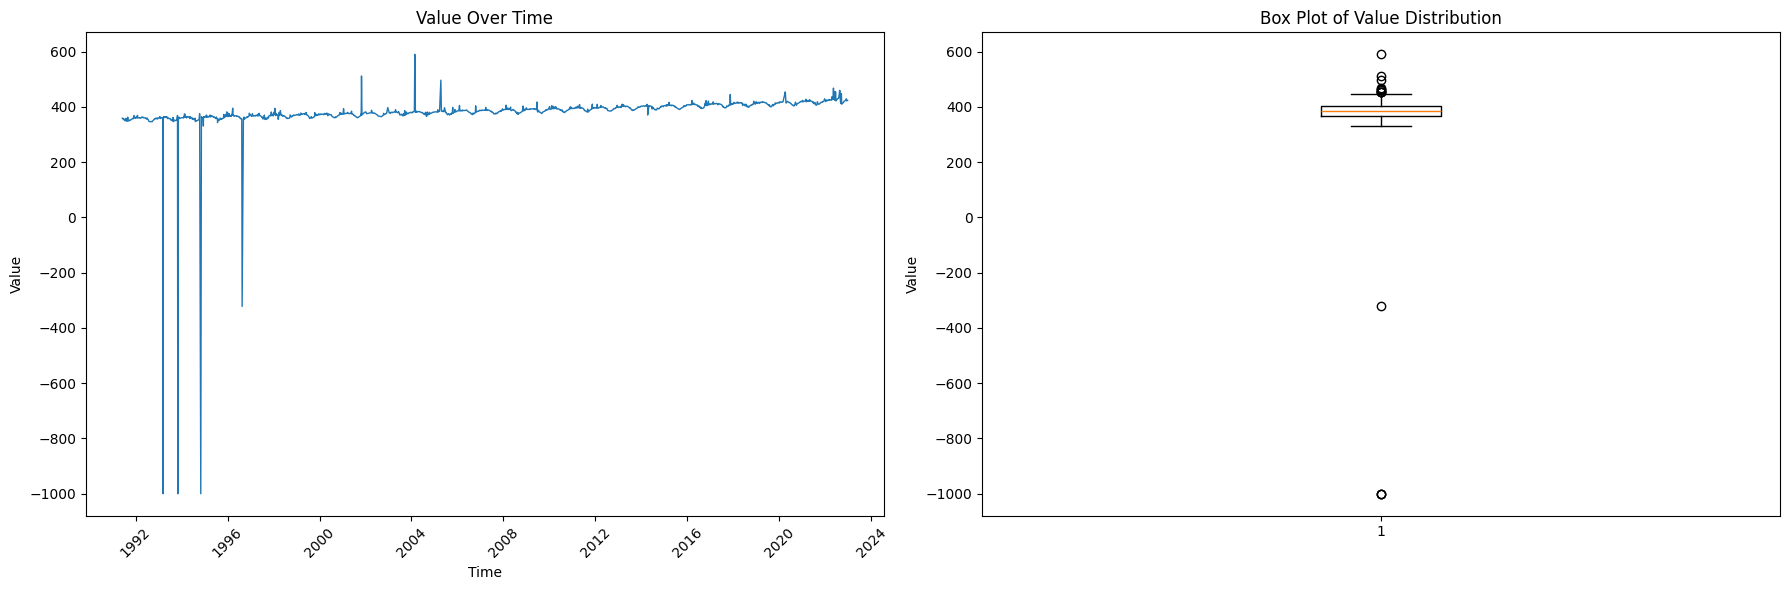

In [5]:
import matplotlib.pyplot as plt

# Create time column
grouped_df['time'] = pd.to_datetime(grouped_df[['year', 'month', 'day', 'hour', 'minute']])
grouped_df = grouped_df.sort_values('time')

# Draw line diagrams and box diagrams to represent the distribution of values
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

ax[0].plot(grouped_df['time'], grouped_df['value'], linestyle='-', linewidth=1)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Value')
ax[0].set_title('Value Over Time')
ax[0].tick_params(axis='x', rotation=45)

ax[1].boxplot(grouped_df['value'])
ax[1].set_ylabel('Value')
ax[1].set_title('Box Plot of Value Distribution')

plt.tight_layout()
plt.show()


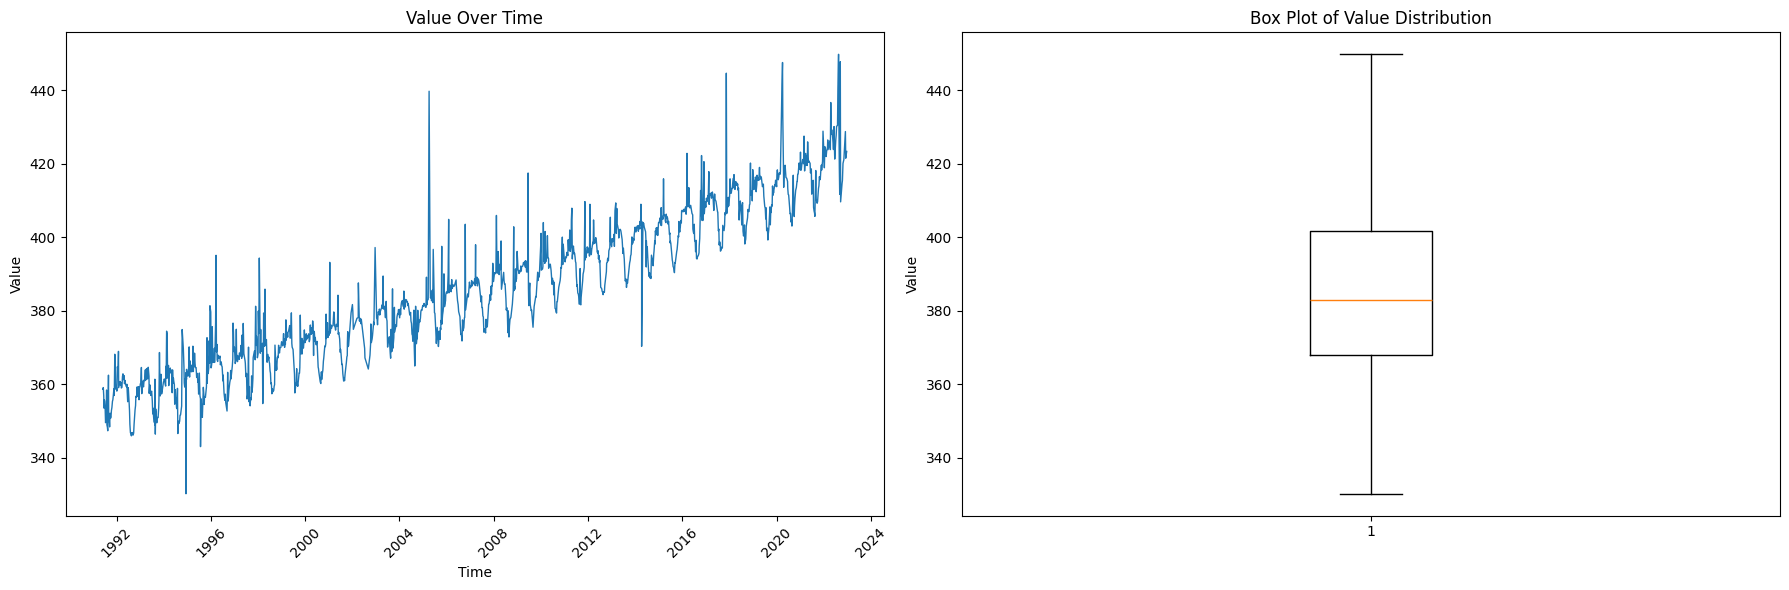

In [6]:
# Find the location of the outlier (assuming more than 1.5 times IQR is the outlier)
Q1 = grouped_df['value'].quantile(0.25)
Q3 = grouped_df['value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Labeled outlier
outliers = (grouped_df['value'] < lower_bound) | (grouped_df['value'] > upper_bound)

# Replace the outlier with the average of the preceding and following values
for i in range(1, len(grouped_df) - 1):
    if outliers.iloc[i]:
        grouped_df.at[i, 'value'] = (grouped_df['value'].iloc[i - 1] + grouped_df['value'].iloc[i + 1]) / 2


fig, ax = plt.subplots(1, 2, figsize=(18, 6))

ax[0].plot(grouped_df['time'], grouped_df['value'], linestyle='-', linewidth=1)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Value')
ax[0].set_title('Value Over Time')
ax[0].tick_params(axis='x', rotation=45)

ax[1].boxplot(grouped_df['value'])
ax[1].set_ylabel('Value')
ax[1].set_title('Box Plot of Value Distribution')

plt.tight_layout()
plt.show()

In this way, I collate the values of the collected carbon dioxide. Outliers are replaced by the average of adjacent values because the data has a periodic trend

Then, I use the same way to clean other GHG data.

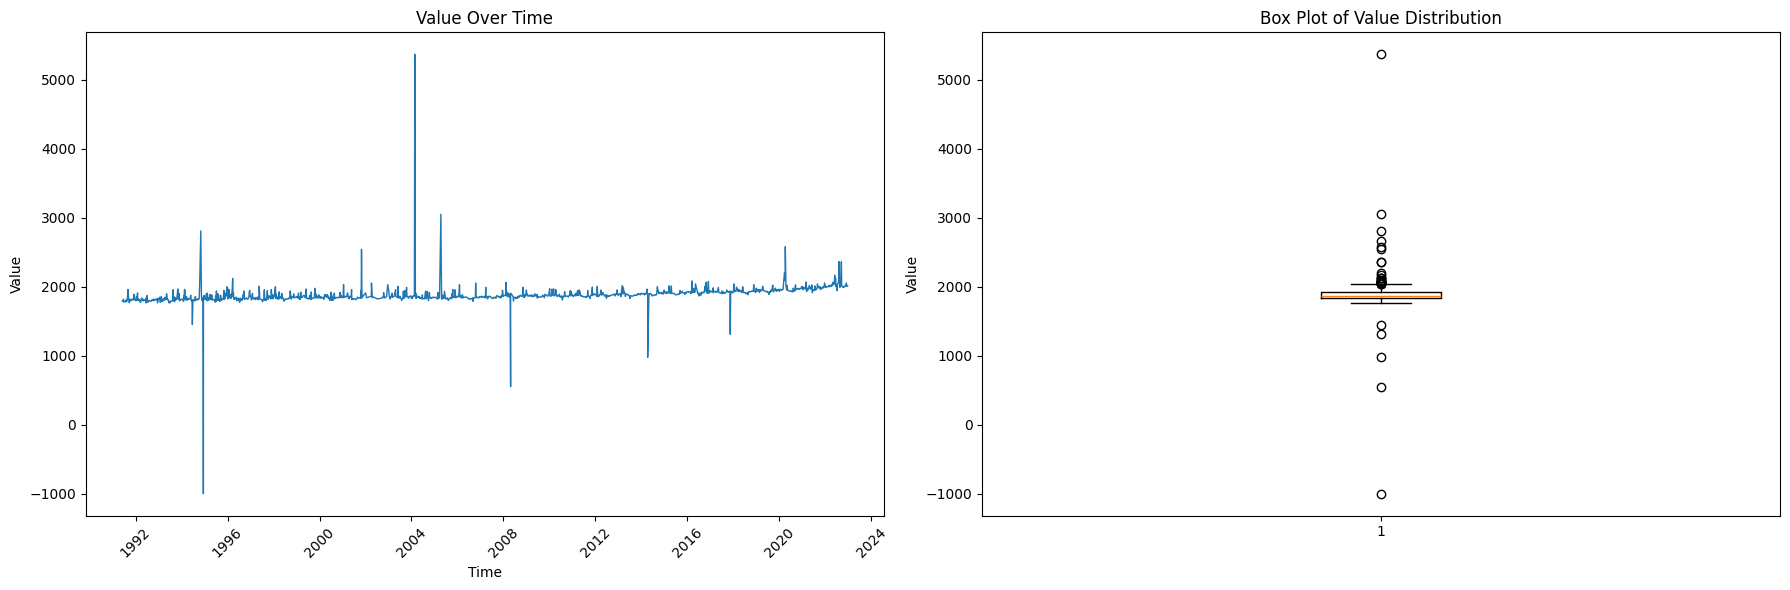

In [7]:
file_path = 'IRE_GHG/ch4_mhd_surface-flask_1_ccgg_event.txt'
df = pd.read_csv(file_path, delimiter='\s+', comment='#')

columns_needed = ['year', 'month', 'day', 'hour', 'minute', 'second', 'value']

new_df = df[columns_needed]

new_df = new_df.drop(columns=['second'])

grouped_df = new_df.groupby(['year', 'month', 'day', 'hour', 'minute']).agg({'value': 'mean'}).reset_index()

grouped_df['time'] = pd.to_datetime(grouped_df[['year', 'month', 'day', 'hour', 'minute']])

grouped_df = grouped_df.sort_values('time')

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

ax[0].plot(grouped_df['time'], grouped_df['value'], linestyle='-', linewidth=1)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Value')
ax[0].set_title('Value Over Time')
ax[0].tick_params(axis='x', rotation=45)

ax[1].boxplot(grouped_df['value'])
ax[1].set_ylabel('Value')
ax[1].set_title('Box Plot of Value Distribution')

plt.tight_layout()
plt.show()

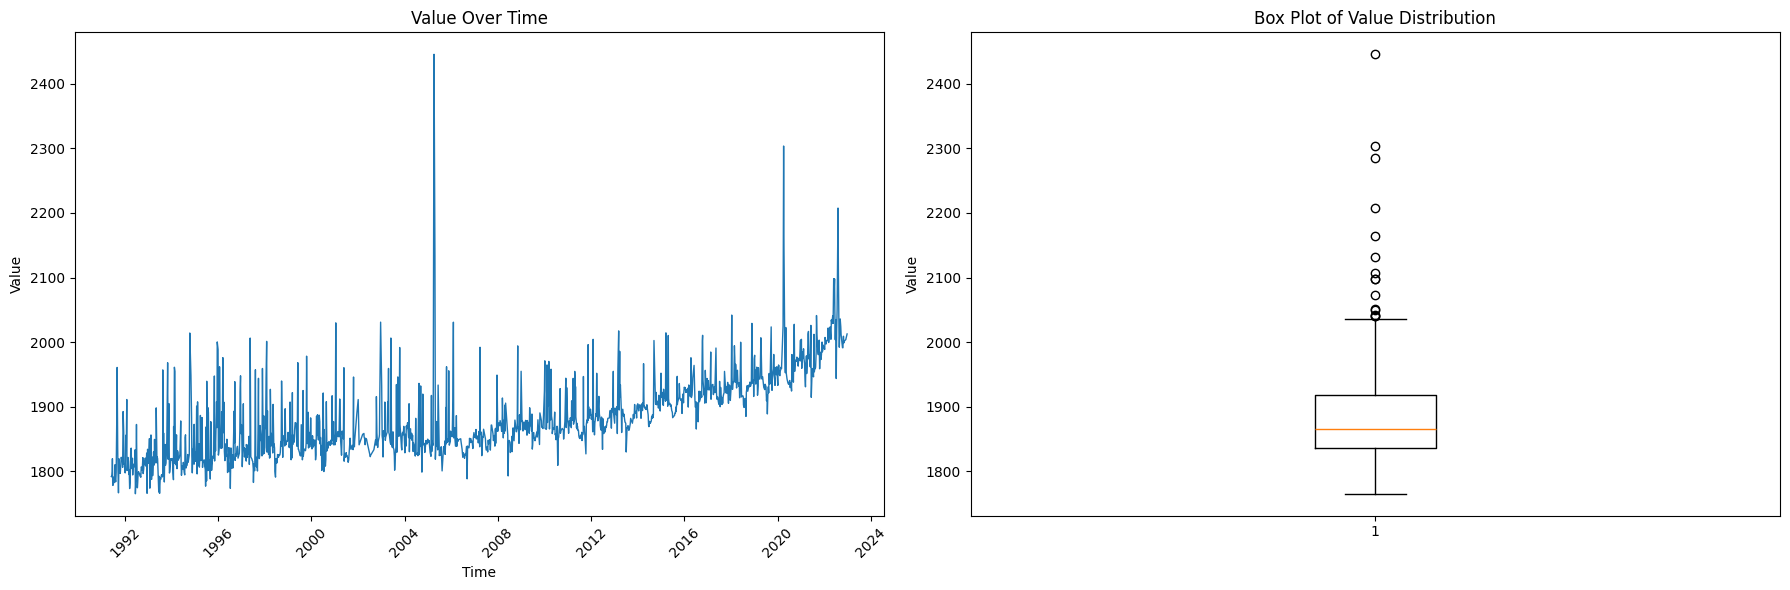

In [8]:
Q1 = grouped_df['value'].quantile(0.25)
Q3 = grouped_df['value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (grouped_df['value'] < lower_bound) | (grouped_df['value'] > upper_bound)

for i in range(1, len(grouped_df) - 1):
    if outliers.iloc[i]:
        grouped_df.at[i, 'value'] = (grouped_df['value'].iloc[i - 1] + grouped_df['value'].iloc[i + 1]) / 2

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

ax[0].plot(grouped_df['time'], grouped_df['value'], linestyle='-', linewidth=1)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Value')
ax[0].set_title('Value Over Time')
ax[0].tick_params(axis='x', rotation=45)

ax[1].boxplot(grouped_df['value'])
ax[1].set_ylabel('Value')
ax[1].set_title('Box Plot of Value Distribution')

plt.tight_layout()
plt.show()

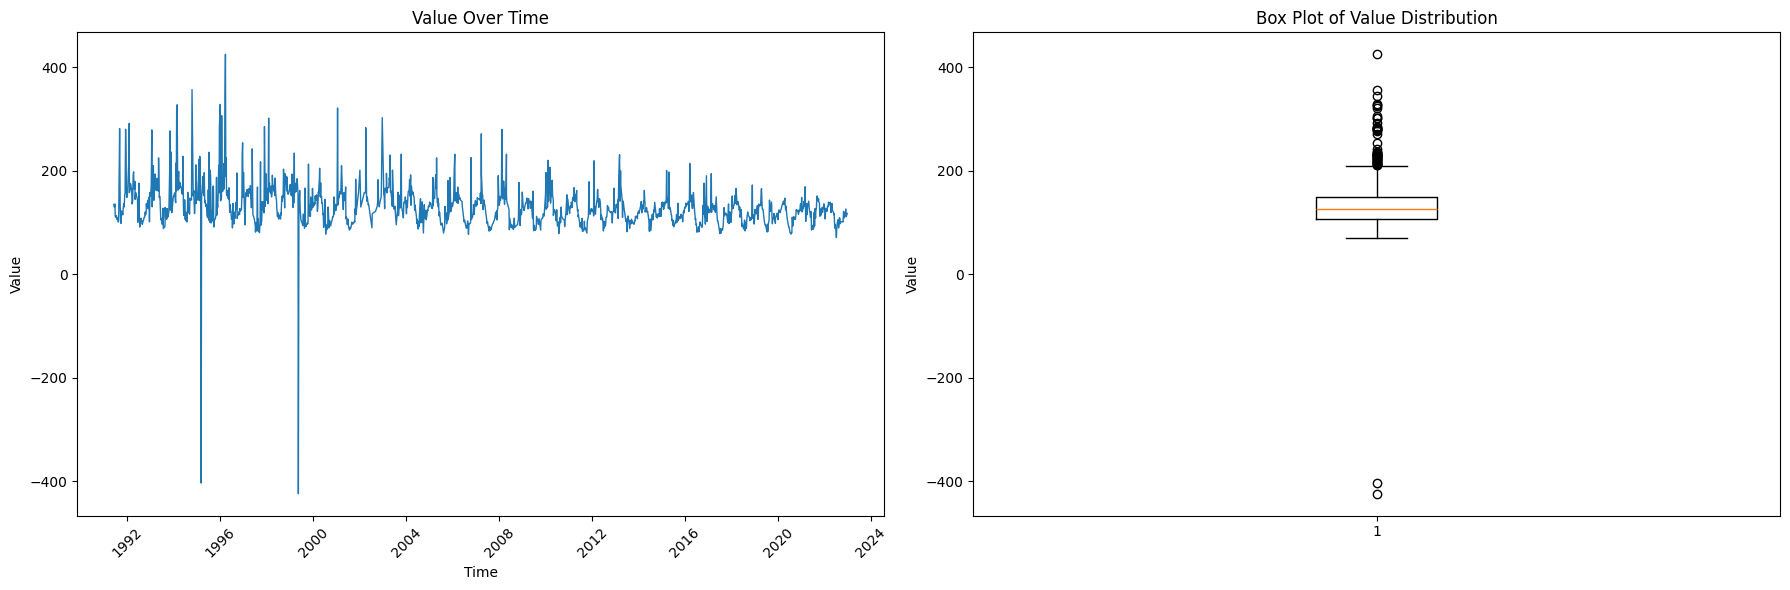

Outliers before replacement:
                    time       value
13   1991-08-29 11:10:00  228.050000
14   1991-09-02 12:33:00  281.660000
27   1991-12-05 12:57:00  280.335000
28   1991-12-14 11:49:00  216.560000
34   1992-01-24 11:25:00  220.445000
35   1992-01-31 13:05:00  291.710000
85   1993-01-20 15:45:00  279.006667
105  1993-05-06 13:00:00  224.935000
133  1993-11-01 16:50:00  277.070000
135  1993-11-20 14:50:00  236.180000
146  1994-02-03 12:05:00  214.765000
148  1994-02-15 09:00:00  325.355000
149  1994-02-23 11:40:00  327.650000
163  1994-05-25 15:50:00  227.955000
183  1994-10-14 10:45:00  356.850000
190  1994-12-12 12:34:00  211.455000
200  1995-01-30 09:55:00  222.385000
204  1995-02-13 12:52:00  227.715000
207  1995-03-07 09:50:00 -403.500000
226  1995-07-07 08:35:00  235.855000
248  1995-12-07 10:10:00  210.720000
250  1995-12-18 12:00:00  285.040000
251  1995-12-31 13:00:00  328.240000
255  1996-01-23 16:20:00  306.560000
260  1996-02-25 17:20:00  213.940000
263  1996

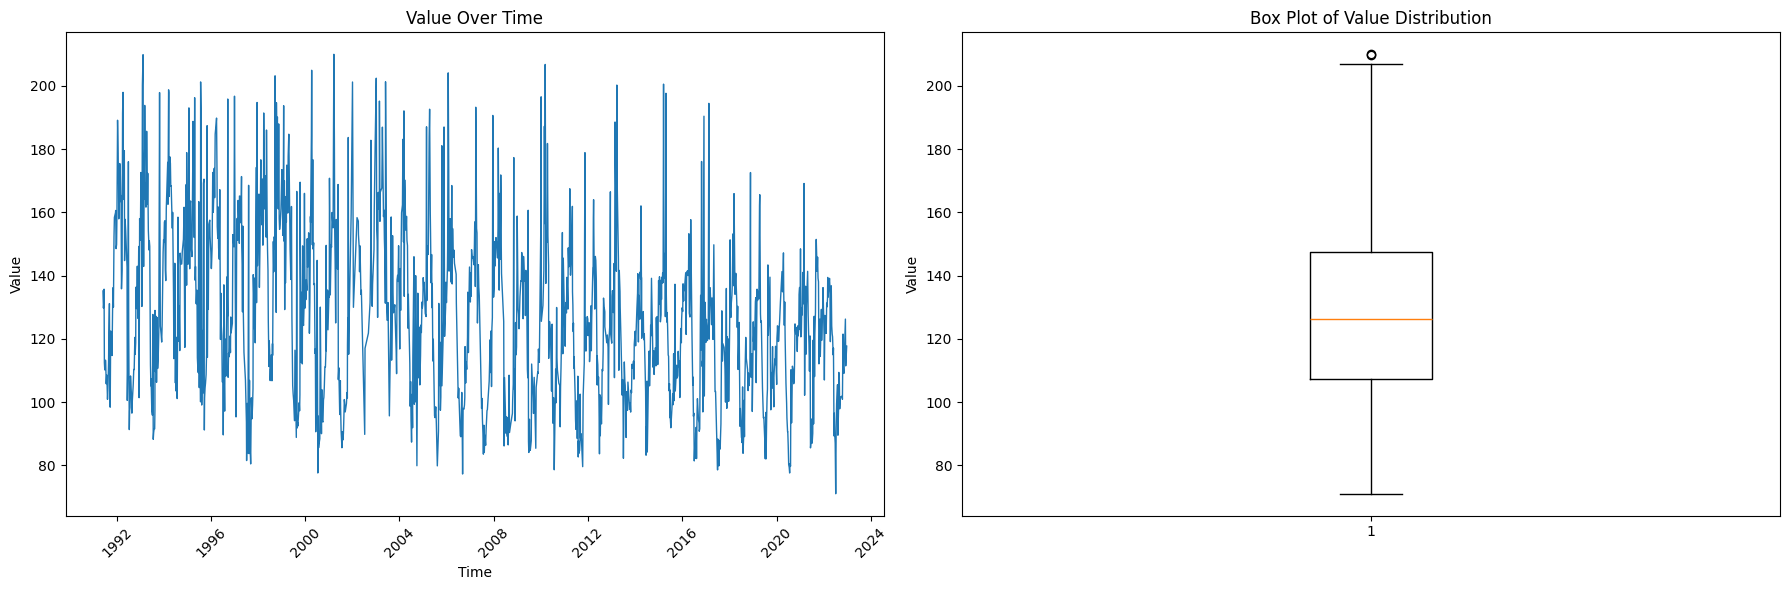

In [9]:
file_path = 'IRE_GHG/co_mhd_surface-flask_1_ccgg_event.txt'

df = pd.read_csv(file_path, delimiter='\s+', comment='#')

columns_needed = ['year', 'month', 'day', 'hour', 'minute', 'second', 'value']

new_df = df[columns_needed]

new_df = new_df.drop(columns=['second'])

grouped_df = new_df.groupby(['year', 'month', 'day', 'hour', 'minute']).agg({'value': 'mean'}).reset_index()

grouped_df['time'] = pd.to_datetime(grouped_df[['year', 'month', 'day', 'hour', 'minute']])

grouped_df = grouped_df.sort_values('time')


fig, ax = plt.subplots(1, 2, figsize=(18, 6))

ax[0].plot(grouped_df['time'], grouped_df['value'], linestyle='-', linewidth=1)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Value')
ax[0].set_title('Value Over Time')
ax[0].tick_params(axis='x', rotation=45)

ax[1].boxplot(grouped_df['value'])
ax[1].set_ylabel('Value')
ax[1].set_title('Box Plot of Value Distribution')

plt.tight_layout()
plt.show()

Q1 = grouped_df['value'].quantile(0.25)
Q3 = grouped_df['value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (grouped_df['value'] < lower_bound) | (grouped_df['value'] > upper_bound)

print("Outliers before replacement:")
print(grouped_df.loc[outliers, ['time', 'value']])

i = 1
while i < len(grouped_df) - 1:
    if outliers.iloc[i]:
        start = i
        while i < len(grouped_df) - 1 and outliers.iloc[i]:
            i += 1
        end = i
        
        if start > 0 and end < len(grouped_df) - 1:
            left_value = grouped_df['value'].iloc[start - 1]
            right_value = grouped_df['value'].iloc[end]
            for j in range(start, end):
                grouped_df.at[j, 'value'] = left_value + (right_value - left_value) * (j - start + 1) / (end - start + 1)
    i += 1

outliers_after = (grouped_df['value'] < lower_bound) | (grouped_df['value'] > upper_bound)
print("Outliers after replacement:")
print(grouped_df.loc[outliers_after, ['time', 'value']])

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

ax[0].plot(grouped_df['time'], grouped_df['value'], linestyle='-', linewidth=1)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Value')
ax[0].set_title('Value Over Time')
ax[0].tick_params(axis='x', rotation=45)

ax[1].boxplot(grouped_df['value'])
ax[1].set_ylabel('Value')
ax[1].set_title('Box Plot of Value Distribution')

plt.tight_layout()
plt.show()

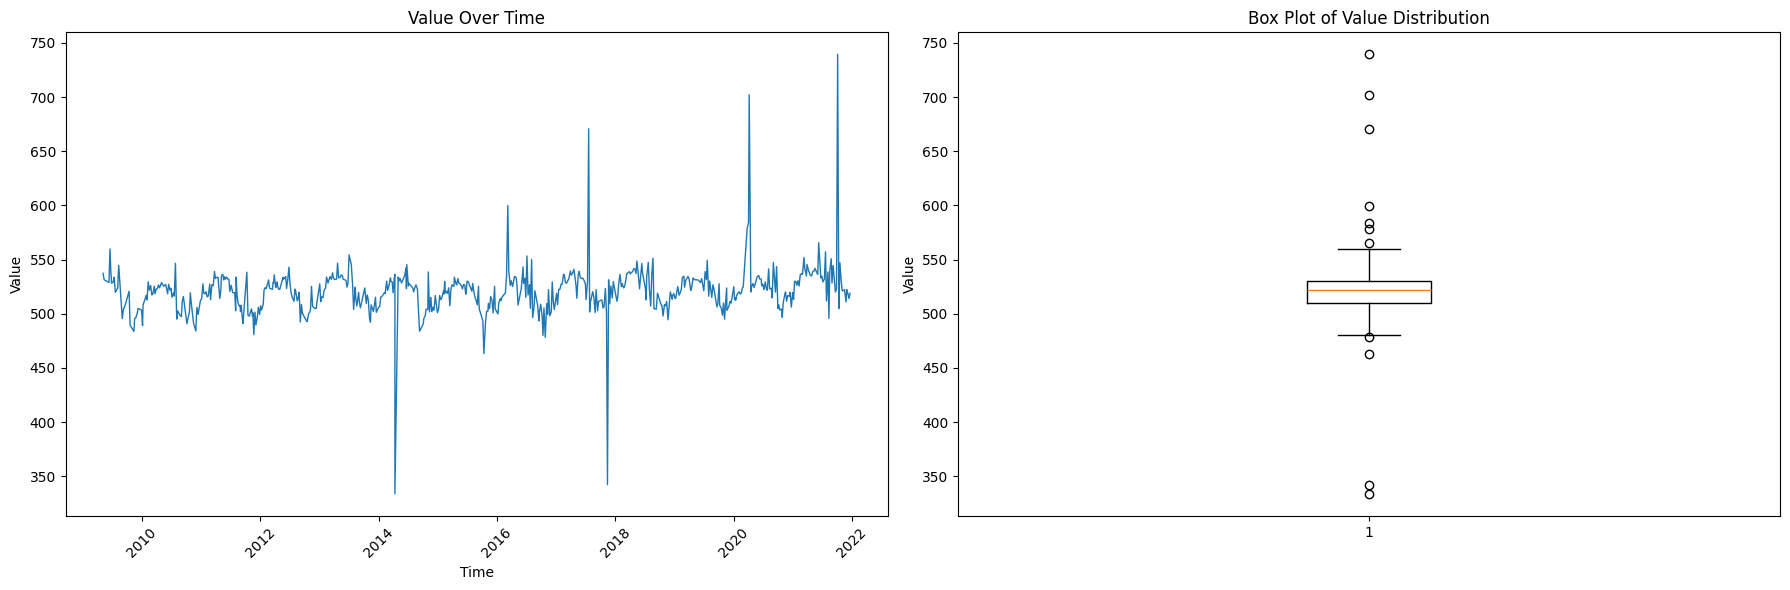

Outliers before replacement:
                   time       value
233 2014-04-11 10:00:00  333.710000
304 2015-10-12 13:35:00  463.255000
323 2016-03-08 10:40:00  599.870000
353 2016-10-25 13:10:00  478.220000
389 2017-07-20 10:00:00  670.795000
404 2017-11-13 12:00:00  342.283333
512 2020-03-24 15:15:00  578.730000
513 2020-04-02 09:30:00  584.245000
514 2020-04-06 11:00:00  702.085000
573 2021-06-09 10:00:00  565.635000
588 2021-10-04 09:50:00  739.550000
Outliers after replacement:
Empty DataFrame
Columns: [time, value]
Index: []


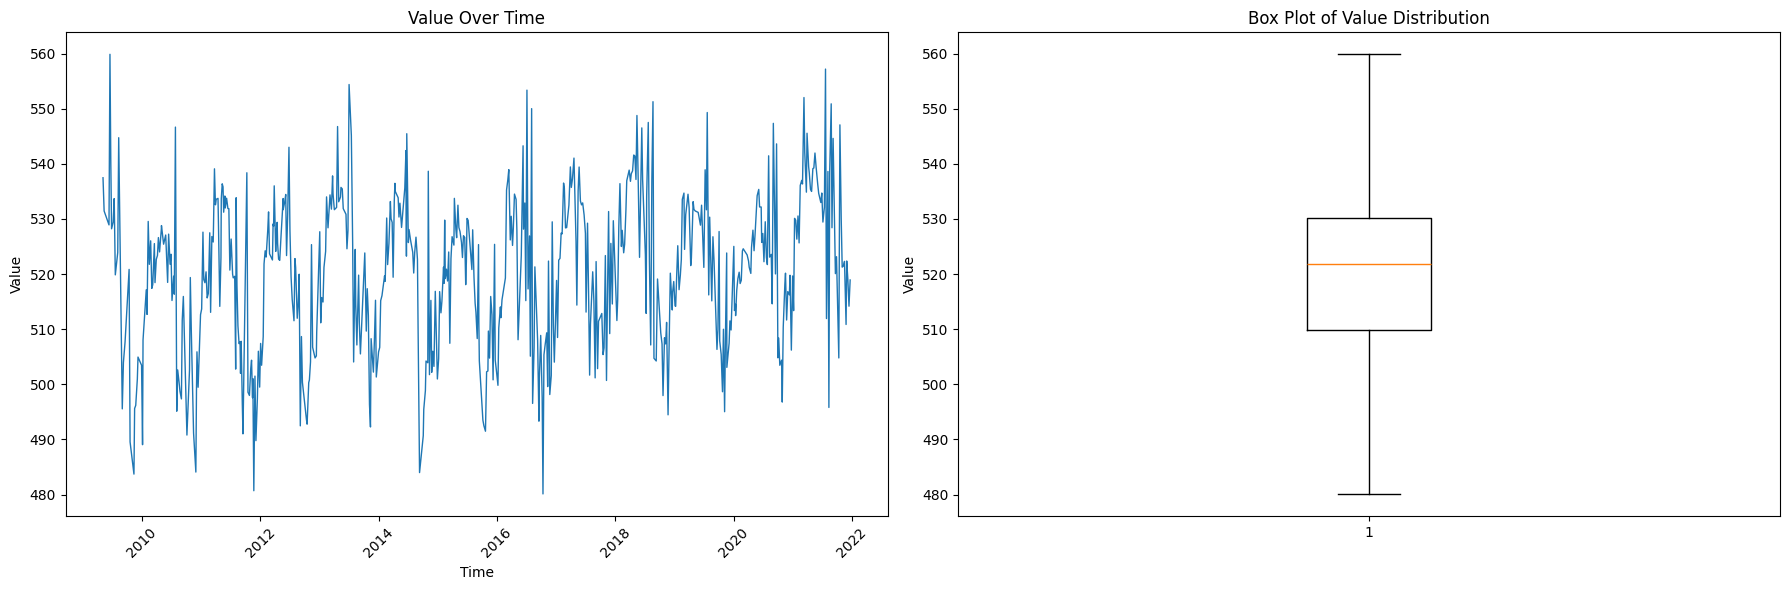

In [10]:
file_path = 'IRE_GHG/h2_mhd_surface-flask_1_ccgg_event.txt'


df = pd.read_csv(file_path, delimiter='\s+', comment='#')

columns_needed = ['year', 'month', 'day', 'hour', 'minute', 'second', 'value']

new_df = df[columns_needed]

new_df = new_df.drop(columns=['second'])

grouped_df = new_df.groupby(['year', 'month', 'day', 'hour', 'minute']).agg({'value': 'mean'}).reset_index()

grouped_df['time'] = pd.to_datetime(grouped_df[['year', 'month', 'day', 'hour', 'minute']])

grouped_df = grouped_df.sort_values('time')


fig, ax = plt.subplots(1, 2, figsize=(18, 6))

ax[0].plot(grouped_df['time'], grouped_df['value'], linestyle='-', linewidth=1)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Value')
ax[0].set_title('Value Over Time')
ax[0].tick_params(axis='x', rotation=45)

ax[1].boxplot(grouped_df['value'])
ax[1].set_ylabel('Value')
ax[1].set_title('Box Plot of Value Distribution')

plt.tight_layout()
plt.show()

Q1 = grouped_df['value'].quantile(0.25)
Q3 = grouped_df['value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (grouped_df['value'] < lower_bound) | (grouped_df['value'] > upper_bound)

print("Outliers before replacement:")
print(grouped_df.loc[outliers, ['time', 'value']])

i = 1
while i < len(grouped_df) - 1:
    if outliers.iloc[i]:
        start = i
        while i < len(grouped_df) - 1 and outliers.iloc[i]:
            i += 1
        end = i
        
        if start > 0 and end < len(grouped_df) - 1:
            left_value = grouped_df['value'].iloc[start - 1]
            right_value = grouped_df['value'].iloc[end]
            for j in range(start, end):
                grouped_df.at[j, 'value'] = left_value + (right_value - left_value) * (j - start + 1) / (end - start + 1)
    i += 1

outliers_after = (grouped_df['value'] < lower_bound) | (grouped_df['value'] > upper_bound)
print("Outliers after replacement:")
print(grouped_df.loc[outliers_after, ['time', 'value']])

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

ax[0].plot(grouped_df['time'], grouped_df['value'], linestyle='-', linewidth=1)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Value')
ax[0].set_title('Value Over Time')
ax[0].tick_params(axis='x', rotation=45)

ax[1].boxplot(grouped_df['value'])
ax[1].set_ylabel('Value')
ax[1].set_title('Box Plot of Value Distribution')

plt.tight_layout()
plt.show()

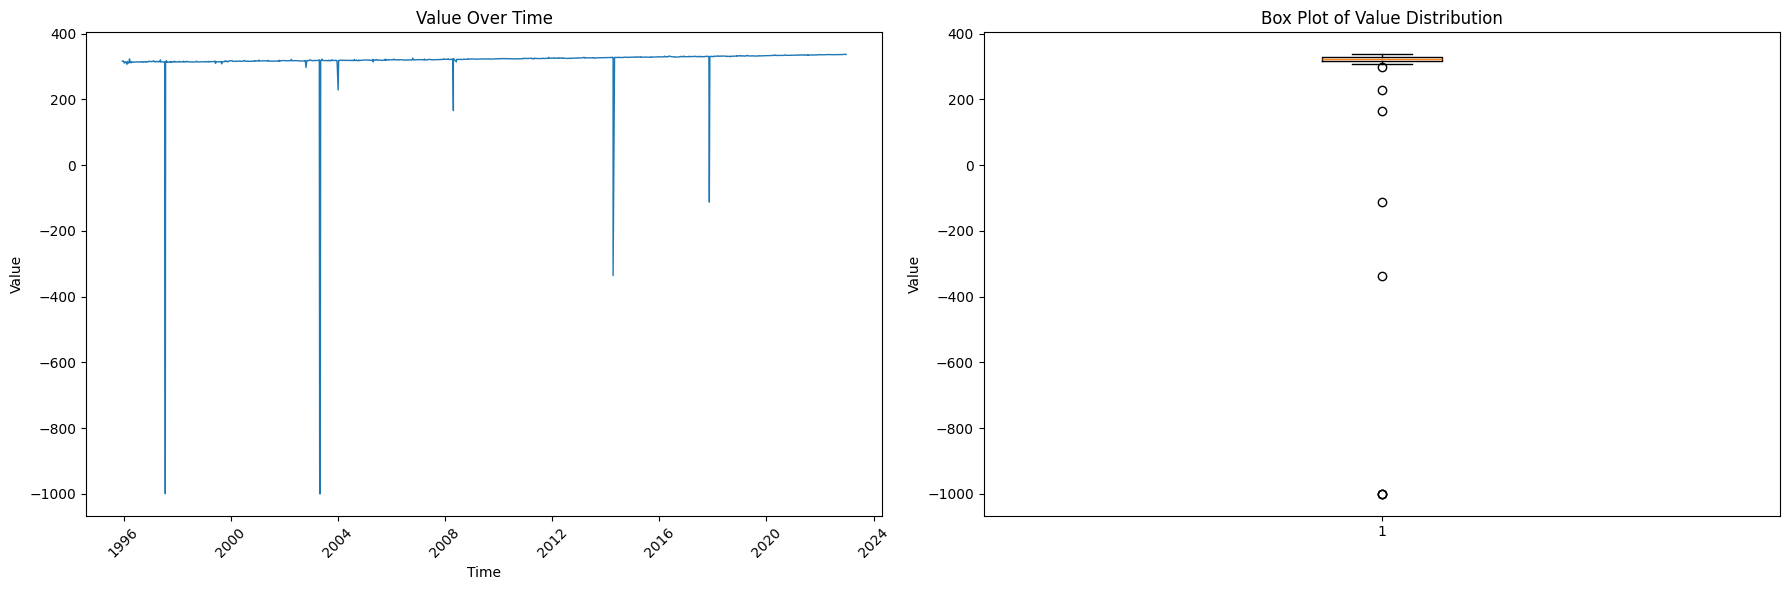

Outliers before replacement:
                    time    value
81   1997-07-23 17:30:00 -999.990
320  2002-10-23 10:30:00  296.970
341  2003-04-28 16:05:00 -999.990
342  2003-05-06 11:17:00 -999.990
374  2004-01-05 12:10:00  228.475
570  2008-04-24 13:55:00  165.895
849  2014-04-11 10:00:00 -336.185
1020 2017-11-13 12:00:00 -112.490
Outliers after replacement:
Empty DataFrame
Columns: [time, value]
Index: []


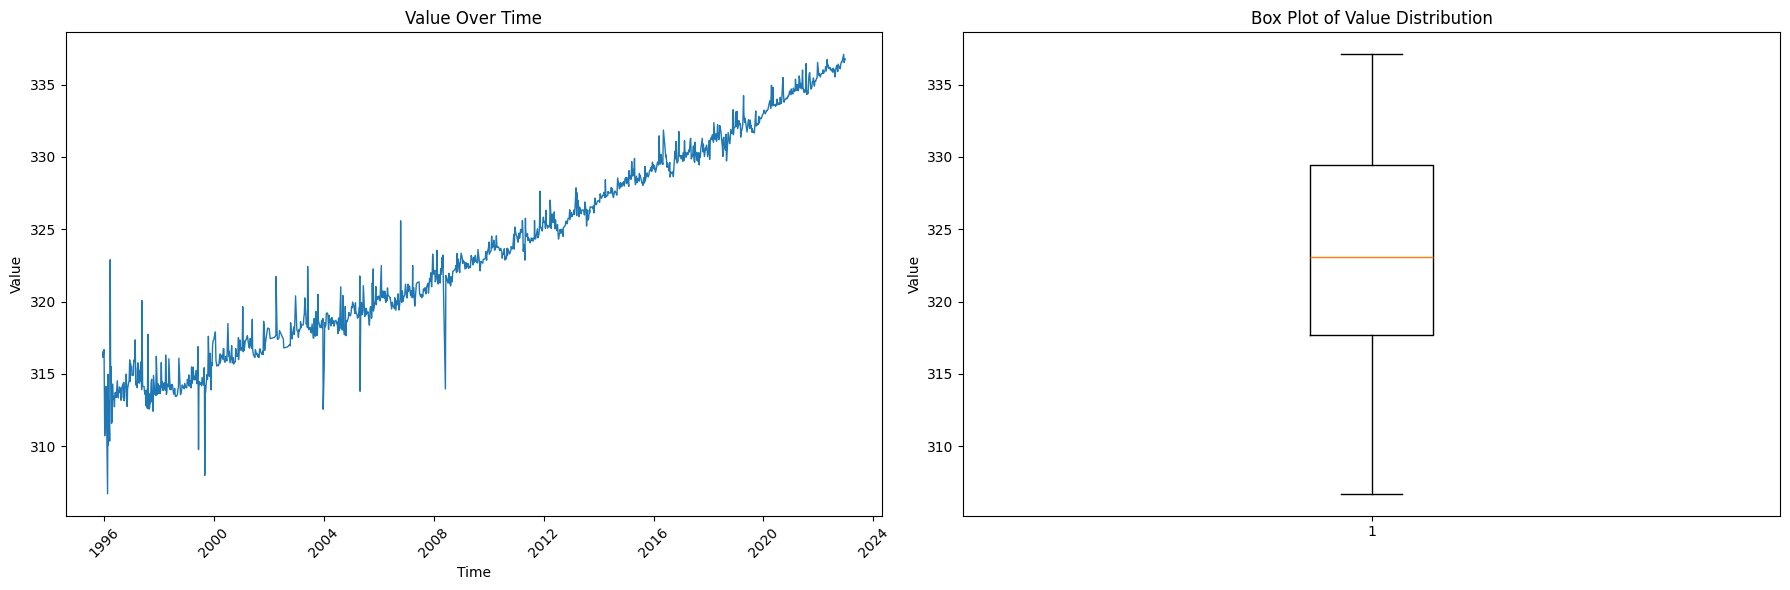

In [11]:
file_path = 'IRE_GHG/n2o_mhd_surface-flask_1_ccgg_event.txt'

df = pd.read_csv(file_path, delimiter='\s+', comment='#')

columns_needed = ['year', 'month', 'day', 'hour', 'minute', 'second', 'value']

new_df = df[columns_needed]

new_df = new_df.drop(columns=['second'])

grouped_df = new_df.groupby(['year', 'month', 'day', 'hour', 'minute']).agg({'value': 'mean'}).reset_index()

grouped_df['time'] = pd.to_datetime(grouped_df[['year', 'month', 'day', 'hour', 'minute']])

grouped_df = grouped_df.sort_values('time')


fig, ax = plt.subplots(1, 2, figsize=(18, 6))

ax[0].plot(grouped_df['time'], grouped_df['value'], linestyle='-', linewidth=1)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Value')
ax[0].set_title('Value Over Time')
ax[0].tick_params(axis='x', rotation=45)

ax[1].boxplot(grouped_df['value'])
ax[1].set_ylabel('Value')
ax[1].set_title('Box Plot of Value Distribution')

plt.tight_layout()
plt.show()

Q1 = grouped_df['value'].quantile(0.25)
Q3 = grouped_df['value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (grouped_df['value'] < lower_bound) | (grouped_df['value'] > upper_bound)

print("Outliers before replacement:")
print(grouped_df.loc[outliers, ['time', 'value']])

i = 1
while i < len(grouped_df) - 1:
    if outliers.iloc[i]:
        start = i
        while i < len(grouped_df) - 1 and outliers.iloc[i]:
            i += 1
        end = i
        
        if start > 0 and end < len(grouped_df) - 1:
            left_value = grouped_df['value'].iloc[start - 1]
            right_value = grouped_df['value'].iloc[end]
            for j in range(start, end):
                grouped_df.at[j, 'value'] = left_value + (right_value - left_value) * (j - start + 1) / (end - start + 1)
    i += 1

outliers_after = (grouped_df['value'] < lower_bound) | (grouped_df['value'] > upper_bound)
print("Outliers after replacement:")
print(grouped_df.loc[outliers_after, ['time', 'value']])

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

ax[0].plot(grouped_df['time'], grouped_df['value'], linestyle='-', linewidth=1)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Value')
ax[0].set_title('Value Over Time')
ax[0].tick_params(axis='x', rotation=45)

ax[1].boxplot(grouped_df['value'])
ax[1].set_ylabel('Value')
ax[1].set_title('Box Plot of Value Distribution')

plt.tight_layout()
plt.show()

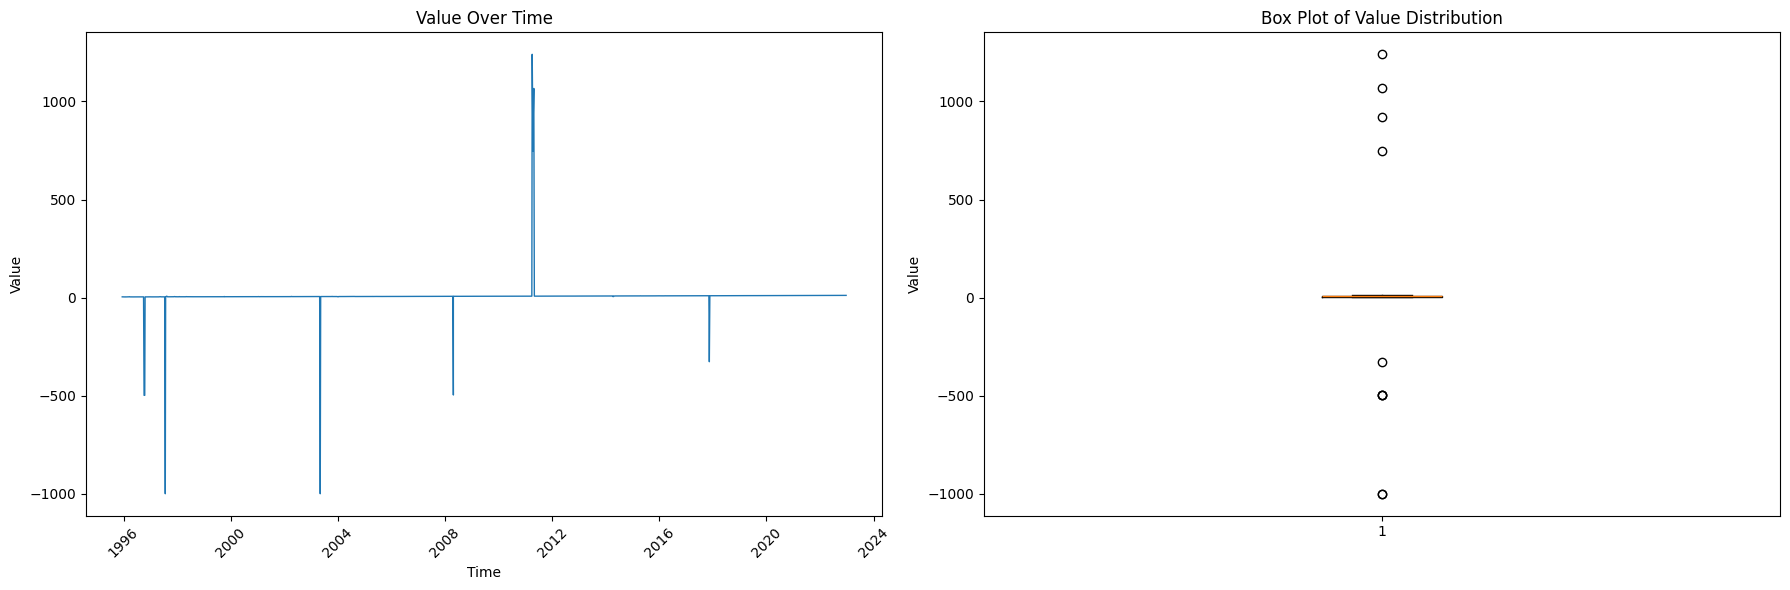

Outliers before replacement:
                    time     value
41   1996-10-07 09:30:00  -498.105
42   1996-10-16 15:15:00  -498.100
79   1997-07-23 17:30:00  -999.990
340  2003-05-06 11:17:00  -999.990
568  2008-04-24 13:55:00  -496.470
695  2011-04-04 09:15:00  1240.570
696  2011-04-15 09:40:00   747.580
697  2011-04-18 11:03:00   920.850
698  2011-04-26 09:30:00  1066.560
1018 2017-11-13 12:00:00  -326.900
Outliers after replacement:
Empty DataFrame
Columns: [time, value]
Index: []


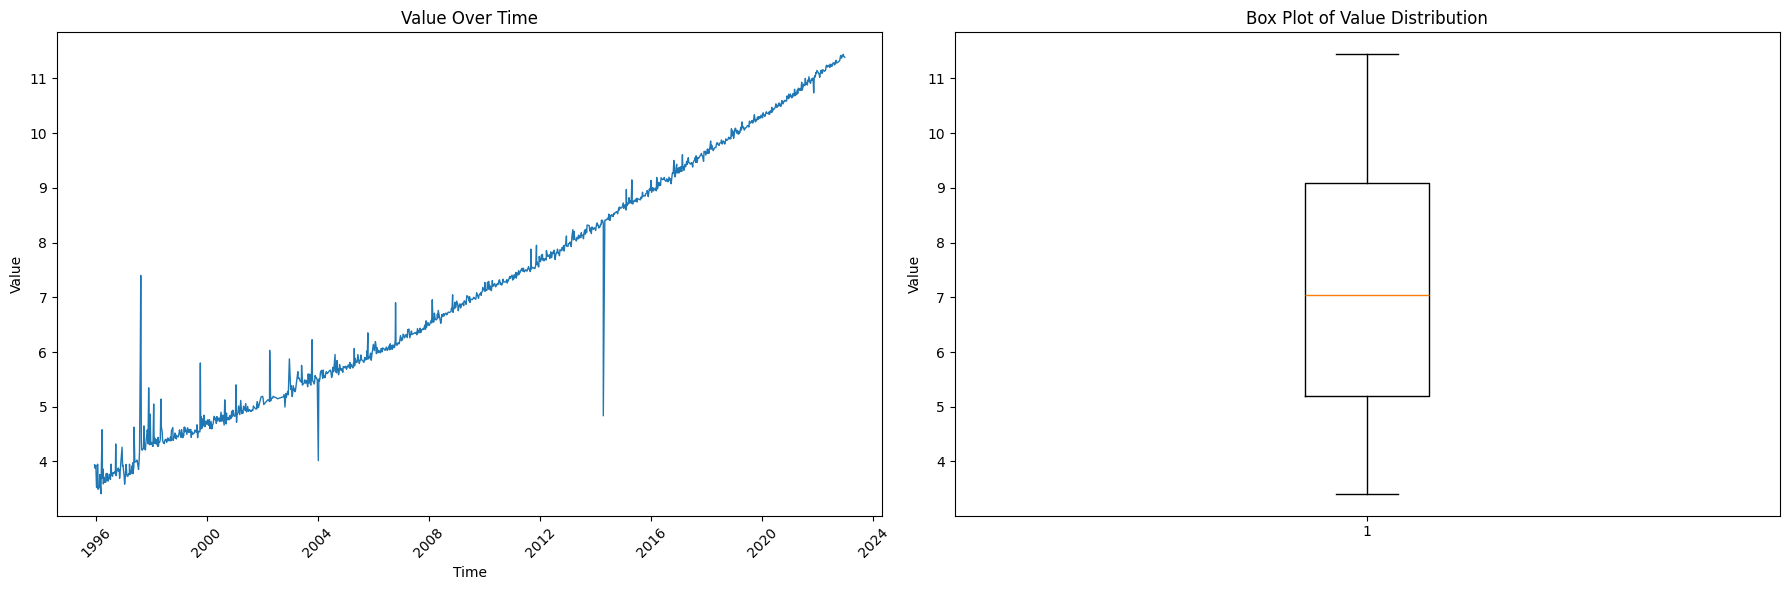

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'IRE_GHG/sf6_mhd_surface-flask_1_ccgg_event.txt'

df = pd.read_csv(file_path, delimiter='\s+', comment='#')

columns_needed = ['year', 'month', 'day', 'hour', 'minute', 'second', 'value']

new_df = df[columns_needed]

new_df = new_df.drop(columns=['second'])

grouped_df = new_df.groupby(['year', 'month', 'day', 'hour', 'minute']).agg({'value': 'mean'}).reset_index()

grouped_df['time'] = pd.to_datetime(grouped_df[['year', 'month', 'day', 'hour', 'minute']])

grouped_df = grouped_df.sort_values('time')


fig, ax = plt.subplots(1, 2, figsize=(18, 6))

ax[0].plot(grouped_df['time'], grouped_df['value'], linestyle='-', linewidth=1)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Value')
ax[0].set_title('Value Over Time')
ax[0].tick_params(axis='x', rotation=45)

ax[1].boxplot(grouped_df['value'])
ax[1].set_ylabel('Value')
ax[1].set_title('Box Plot of Value Distribution')

plt.tight_layout()
plt.show()

Q1 = grouped_df['value'].quantile(0.25)
Q3 = grouped_df['value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (grouped_df['value'] < lower_bound) | (grouped_df['value'] > upper_bound)

print("Outliers before replacement:")
print(grouped_df.loc[outliers, ['time', 'value']])

i = 1
while i < len(grouped_df) - 1:
    if outliers.iloc[i]:
        start = i
        while i < len(grouped_df) - 1 and outliers.iloc[i]:
            i += 1
        end = i
        
        if start > 0 and end < len(grouped_df) - 1:
            left_value = grouped_df['value'].iloc[start - 1]
            right_value = grouped_df['value'].iloc[end]
            for j in range(start, end):
                grouped_df.at[j, 'value'] = left_value + (right_value - left_value) * (j - start + 1) / (end - start + 1)
    i += 1

outliers_after = (grouped_df['value'] < lower_bound) | (grouped_df['value'] > upper_bound)
print("Outliers after replacement:")
print(grouped_df.loc[outliers_after, ['time', 'value']])

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

ax[0].plot(grouped_df['time'], grouped_df['value'], linestyle='-', linewidth=1)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Value')
ax[0].set_title('Value Over Time')
ax[0].tick_params(axis='x', rotation=45)

ax[1].boxplot(grouped_df['value'])
ax[1].set_ylabel('Value')
ax[1].set_title('Box Plot of Value Distribution')

plt.tight_layout()
plt.show()
